### Importing Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading Dataset

In [3]:
fraud_data = pd.read_csv("Fraud.csv")

In [4]:
fraud_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
fraud_data = fraud_data.drop(['step','nameOrig','nameDest','isFlaggedFraud'], axis=1)

The 'isFlaggedFraud' field is kind of pointless to have when we already have the'isFraud' field so I'll be dropping this column. Also I don't think that fields like 'step','nameOrig' and 'nameDest' affects our target variable so dropping them won't do any harm as well.

In [6]:
fraud_data.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


1. In the above table it can be seen that the count value for each column is 6362620, this mean there are no missing values.
2. The dataset is highly imbalanced as more that 75% data for 'isFraud' field is filled with 0s. 

In [7]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 339.8+ MB


### Data Visualization

In [8]:
fraud_data.select_dtypes('object').apply(pd.Series.nunique, axis=0).sort_values(ascending= True)

type    5
dtype: int64

[Text(0, 0, '6.35441e+06'), Text(0, 0, '8213')]

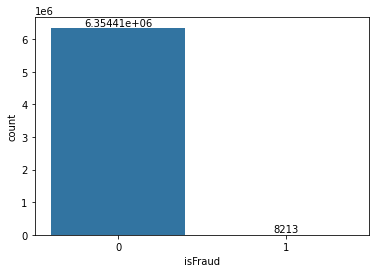

In [9]:
ax = sns.countplot(x='isFraud', data=fraud_data)
ax.bar_label(ax.containers[0])

The above plot also shows that our dataset is highly imbalanced. So if use this dataset as it is, the predications will be biased. 

In [10]:
fraud = fraud_data[fraud_data['isFraud'] == 1]
normal = fraud_data[fraud_data['isFraud'] == 0]

In [11]:
print(fraud.shape)
print(normal.shape)

(8213, 7)
(6354407, 7)


In [12]:
pd.concat([fraud.amount.describe(), normal.amount.describe()], axis=1, keys=['Fraud Amount','Normal Amount'])

,Fraud Amount,Normal Amount
count,8.213000e+03,6.354407e+06
mean,1.467967e+06,1.781970e+05
std,2.404253e+06,5.962370e+05
min,0.000000e+00,1.000000e-02
25%,1.270913e+05,1.336840e+04
50%,4.414234e+05,7.468472e+04
75%,1.517771e+06,2.083648e+05
max,1.000000e+07,9.244552e+07


[Text(0, 0, '2.1515e+06'),
 Text(0, 0, '532909'),
 Text(0, 0, '2.2375e+06'),
 Text(0, 0, '41432'),
 Text(0, 0, '1.39928e+06')]

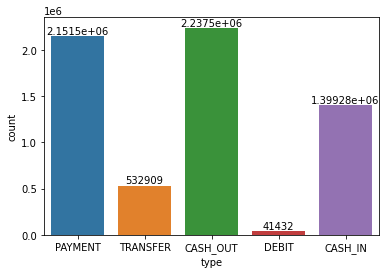

In [13]:
ax = sns.countplot(x='type',data=fraud_data)
ax.bar_label(ax.containers[0])

<AxesSubplot:>

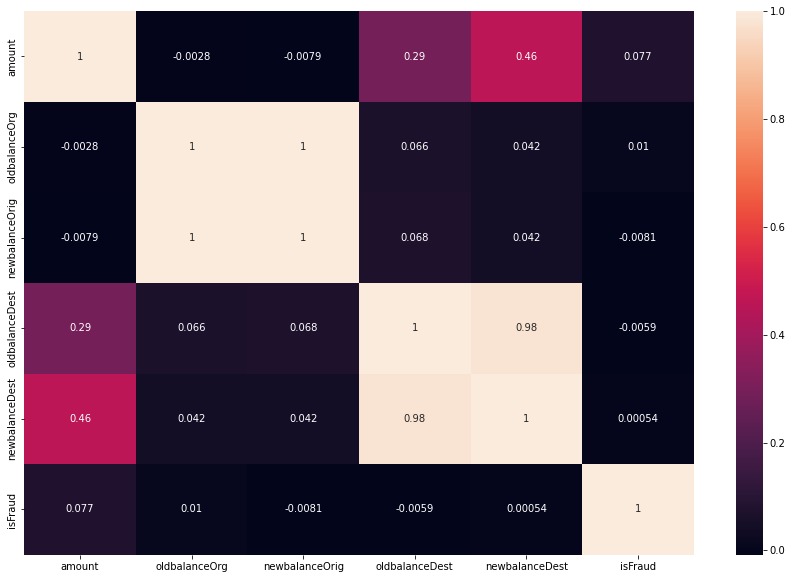

In [14]:
corr = fraud_data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, data=fraud_data, annot=True)

From the above heatmap it can be seen that we've the problem of multicollinearity in the following columns: -
1. newbalanceOrig & oldbalanceOrg
2. newbalanceDest & oldbalanceDest

### Data Preprocessing

In [15]:
from sklearn.preprocessing import LabelEncoder
fraud_data['type_label_encoded'] = LabelEncoder().fit_transform(fraud_data['type'])

In [16]:
fraud_data.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_label_encoded
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,3
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,3
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,4
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,3


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = fraud_data.drop(['isFraud','type'],axis=1)
y = fraud_data['isFraud']

Since our dataset was found to be imbalanced therefore I am going to use SMOTE (Synthetic Minority Oversampling Technique) algorithm to make the data unbiased

In [18]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=12)
X_resampled, y_resampled = sm.fit_resample(X, y)

In [19]:
X_resampled.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_label_encoded
count,1.270881e+07,1.270881e+07,1.270881e+07,1.270881e+07,1.270881e+07,1.270881e+07
mean,8.228849e+05,1.240640e+06,5.227803e+05,8.138292e+05,1.241847e+06,2.103564e+00
std,1.867015e+06,3.252794e+06,2.501732e+06,3.020094e+06,3.472738e+06,1.478144e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.708623e+04,1.061600e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,1.721041e+05,1.190436e+05,0.000000e+00,0.000000e+00,1.232240e+05,1.000000e+00
75%,5.414595e+05,7.946675e+05,0.000000e+00,5.103619e+05,1.086166e+06,4.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,4.000000e+00


In [20]:
y_resampled.describe()

count    12708814.0
mean            0.5
std             0.5
min             0.0
25%             0.0
50%             0.5
75%             1.0
max             1.0
Name: isFraud, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, '6.35441e+06'), Text(0, 0, '6.35441e+06')]

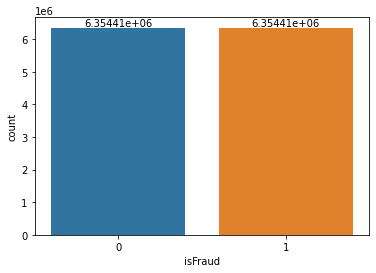

In [21]:
ax = sns.countplot(y_resampled[1:])
ax.bar_label(ax.containers[0])

Now the data is perfectly balanced.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

As mentioned before there is a problem of multicollinearity in the dataset. So I'll use PCA to perform feature extraction and remove multicollinearity from the dataset

Text(0, 0.5, '% variance explained')

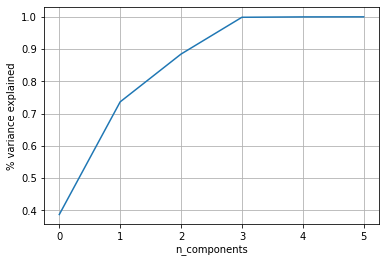

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components = X_train_std.shape[1])
fraud_train_data_pca = pca.fit_transform(X_train_std)

percent_var_explained = pca.explained_variance_/(np.sum(pca.explained_variance_))
cumm_var_explained = np.cumsum(percent_var_explained)

plt.plot(cumm_var_explained)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("% variance explained")

In [24]:
cumm_var_explained

array([0.38742538, 0.73652302, 0.88460296, 0.99866128, 0.9998231 ,
       1.        ])

Since 99.86% of variance is captured by the first 3 PCA, hence we can put n_components = 3

In [25]:
pca = PCA(n_components = 3)
fraud_train_data_pca = pca.fit_transform(X_train_std)
fraud_test_data_pca = pca.transform(X_test_std)

In [26]:
pd.DataFrame(fraud_train_data_pca).head()

,0,1,2
0,-0.900260,0.127366,0.458560
1,-0.910367,0.142715,0.457143
2,1.151826,-1.151311,-0.406661
3,-0.908306,0.144668,0.461497
4,0.660695,-0.686529,-0.845065


In [27]:
fraud_data_pca = pd.DataFrame(fraud_train_data_pca)
fraud_data_pca['isFraud'] = y_train
fraud_data_pca.head()

,0,1,2,isFraud
0,-0.900260,0.127366,0.458560,NaN
1,-0.910367,0.142715,0.457143,0.0
2,1.151826,-1.151311,-0.406661,1.0
3,-0.908306,0.144668,0.461497,1.0
4,0.660695,-0.686529,-0.845065,NaN


<AxesSubplot:>

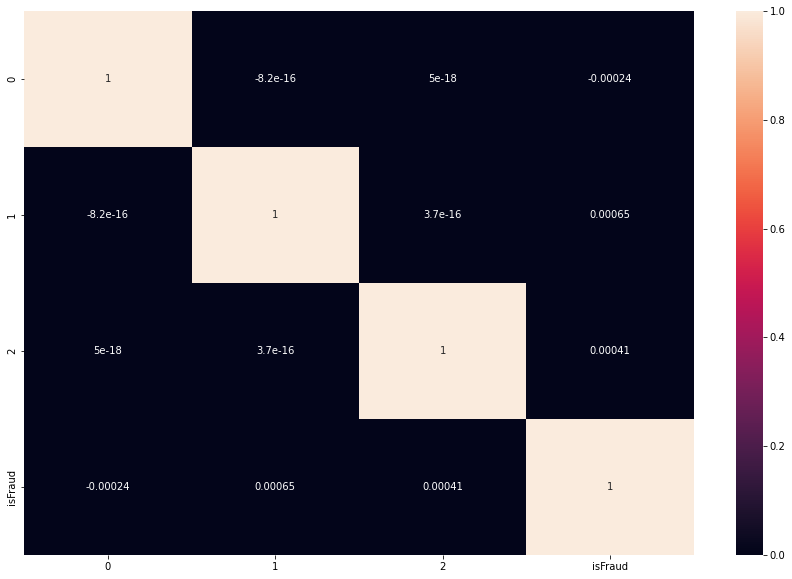

In [28]:
corr = fraud_data_pca.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, data= fraud_data_pca, annot=True)

Hence removed multicollinearity from the dataset

### Model Fitting

In [29]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(fraud_train_data_pca, y_train, eval_metric='aucpr')

y_train_pred = xgb.predict(fraud_train_data_pca)
y_test_pred = xgb.predict(fraud_test_data_pca)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,


### Results

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

print('Training Report')
print(classification_report(y_train_pred,y_train))
print('Accuracy Score: ',accuracy_score(y_train_pred,y_train))
print('F1 Score: ',f1_score(y_train_pred,y_train))
print('\nTesting Report')
print(classification_report(y_test_pred,y_test))
print('Accuracy Score: ',accuracy_score(y_test_pred,y_test))
print('F1 Score: ',f1_score(y_test_pred,y_test))

Training Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4449641
           1       0.71      0.98      0.82      4193

    accuracy                           1.00   4453834
   macro avg       0.86      0.99      0.91   4453834
weighted avg       1.00      1.00      1.00   4453834

Accuracy Score:  0.9996023650634487
F1 Score:  0.8221709006928407

Testing Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1907004
           1       0.71      0.97      0.82      1782

    accuracy                           1.00   1908786
   macro avg       0.85      0.99      0.91   1908786
weighted avg       1.00      1.00      1.00   1908786

Accuracy Score:  0.9995971261314783
F1 Score:  0.8181603215890282


In [31]:
print('For Training Data')
confusion_matrix(y_train, y_train_pred)

For Training Data


array([[4447969,      99],
       [   1672,    4094]])

In [32]:
print('For Testing Data')
confusion_matrix(y_test, y_test_pred)

For Testing Data


array([[1906287,      52],
       [    717,    1730]])